<a href="https://colab.research.google.com/github/JSJeong-me/KOSA-Big-Data_Vision/blob/main/Model/0_rf-PCA_Pay_Score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U pandas-profiling

In [1]:
import pandas as pd

In [ ]:
import pandas_profiling

In [2]:
df = pd.read_csv('credit_cards_dataset.csv')

In [ ]:
df.head(3)

In [ ]:
df.profile_report()

In [ ]:
df.corr(method='spearman')

In [ ]:
df.columns

PCA for Pay_Score Bill_Amount Pay_Amount

In [3]:
from sklearn.decomposition import PCA

In [5]:
df_X_Pay_Score = df[['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]

In [ ]:
df_X_Pay_Score.head(3)

PCA instance 생성

In [10]:
trans = PCA(n_components=1)

In [11]:
X_Pay_Score = df_X_Pay_Score.values

In [12]:
# transform the data
X_dim = trans.fit_transform(X_Pay_Score)

In [13]:
X_dim.shape

(30000, 1)

In [22]:
df_X_dim = pd.DataFrame(X_dim, columns=['Pay_AVR'])

목표변수 : default.payment.next.month  Input 데이터 셋: X

In [23]:
df = pd.concat([df, df_X_dim], axis=1)

In [ ]:
df.head(3)

In [26]:
X = df.drop(['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6','default.payment.next.month'], axis =1).values

In [27]:
y = df['default.payment.next.month'].values

Train Test Data Set 분리

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42, shuffle=True)

RandomForest 모델 생성 및 학습

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
rf = RandomForestClassifier(n_estimators=200, criterion='entropy', max_features='log2', max_depth=15)

In [32]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [33]:
y_predict = rf.predict(X_test)

모델 성능 평가

In [34]:
from sklearn.metrics import confusion_matrix

In [35]:
import matplotlib.pyplot as plt

In [36]:
import numpy as np

In [37]:
import itertools

In [38]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

Confusion matrix, without normalization
[[6613  427]
 [1261  699]]


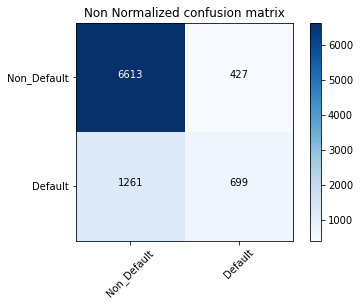

In [39]:
cnf_matrix = confusion_matrix(y_test, y_predict)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Non_Default','Default'], normalize=False,
                      title='Non Normalized confusion matrix')

In [ ]:
from sklearn.metrics import recall_score

In [ ]:
print("Recall score:"+ str(recall_score(y_test, y_predict)))

Recall score:0.3566326530612245
